In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error


In [3]:
# Run this cell to import or install the Data Wrangler widget to show automatic visualization and generate code to fix data quality issues

try:
    import sagemaker_datawrangler
except ImportError:
    !pip install --upgrade sagemaker-datawrangler
    import sagemaker_datawrangler

# Display Pandas DataFrame to view the widget: df, display(df), df.sample()... 

ERROR: Could not find a version that satisfies the requirement sagemaker-datawrangler (from versions: none)
ERROR: No matching distribution found for sagemaker-datawrangler


ModuleNotFoundError: No module named 'sagemaker_datawrangler'

In [5]:
df=pd.read_csv('Fractionator.csv')

In [6]:
from datetime import date
df['Time']=pd.to_datetime(df['Time'])

In [7]:
df=df.set_index('Time')

In [8]:
manipulated_variables=[
                       "AI_2020_OVERHEAD_C5'S_MOL", 
                       "AI_2021_MIDDLE_C7'S_MOL",
                       "AI_2022_BOTTOM_C3'S_MOL"
                        ]

controlled_variables=[
       'FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC-2001_OP_TOP_REFLUX_OUTPUT_%',
       'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 
       'TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF'
                    ]

response_variables=[
       'FIC_2100_PV_FEED_FURNACE_FUEL_SCFH',
       'FIC-2101_PV_TOP_PRODUCT_MBBL/D',
        'FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D',
       'FI-2005_PV_FEED_FLOW_MBBL/D',
       'FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D',
       'FIC_2004_PV_TOP_REFLUX_MBBL/D',
       'QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H',
                    ]

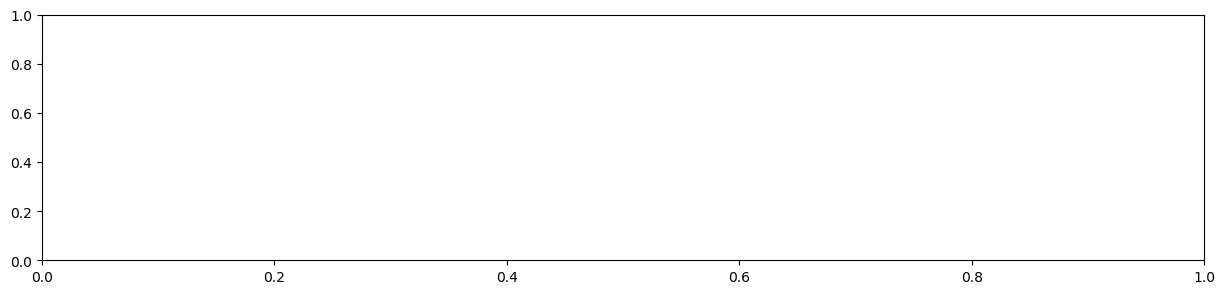

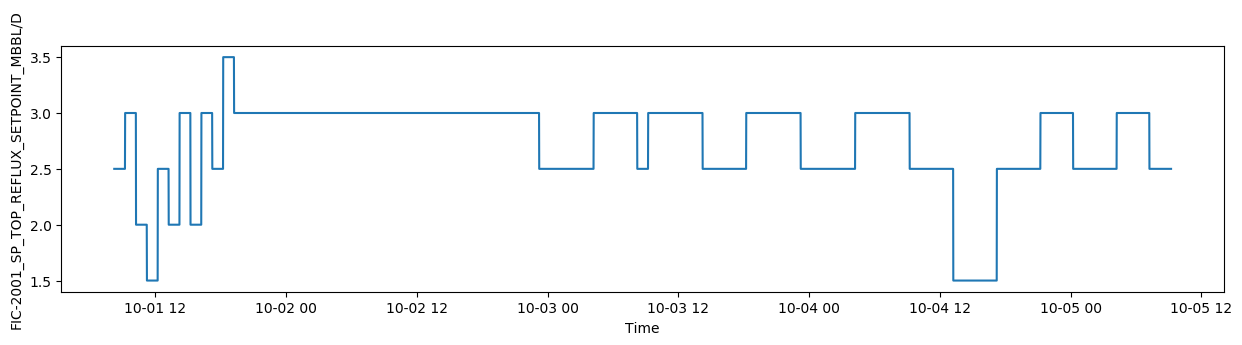

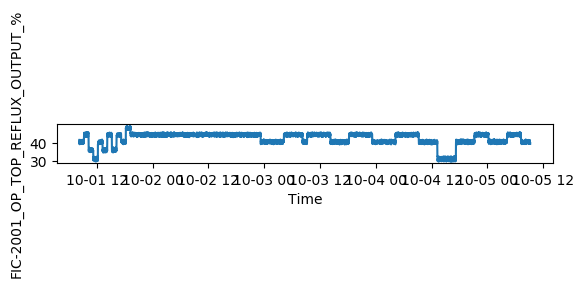

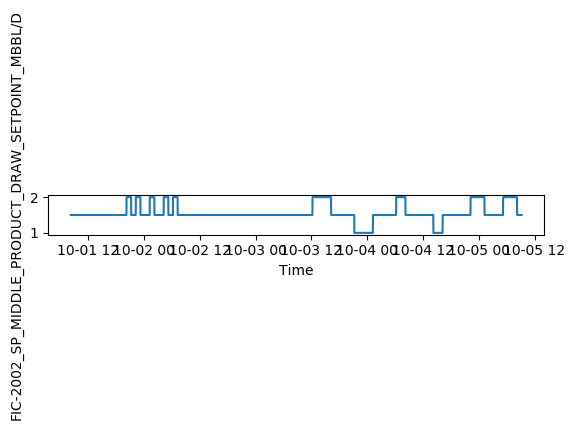

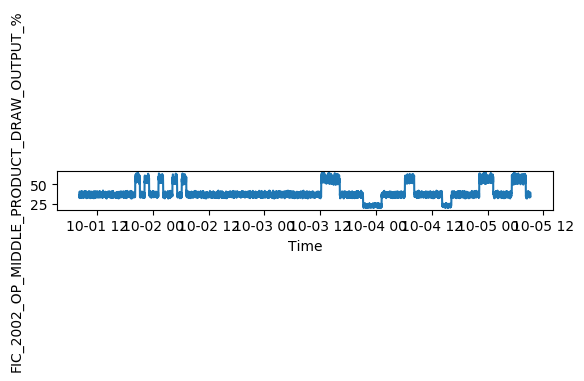

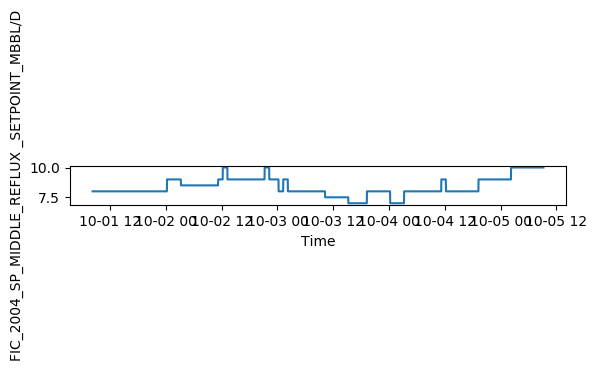

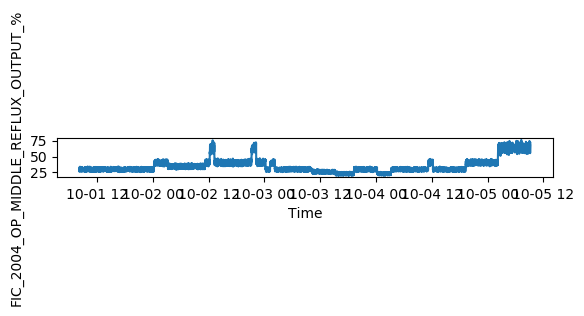

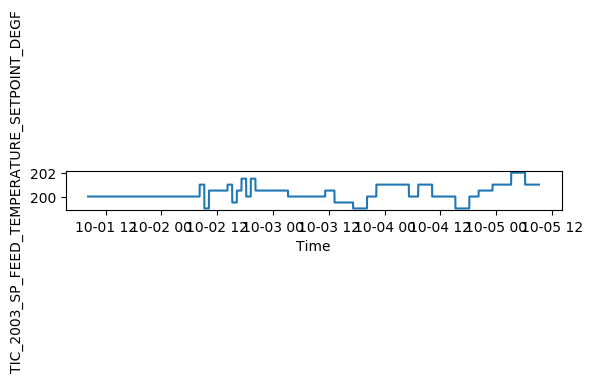

In [10]:
fig1=plt.figure(figsize = (15, 30))

for i in enumerate(controlled_variables):
    plt.subplot(8, 1,i[0]+1)
    fig1=sns.lineplot(x=df.index,y=df[i[1]])
    fig1.figure.savefig('controlled_variables.png')

    plt.show()

In [9]:
import seaborn as sns
import numpy as np
import os
from scipy import stats

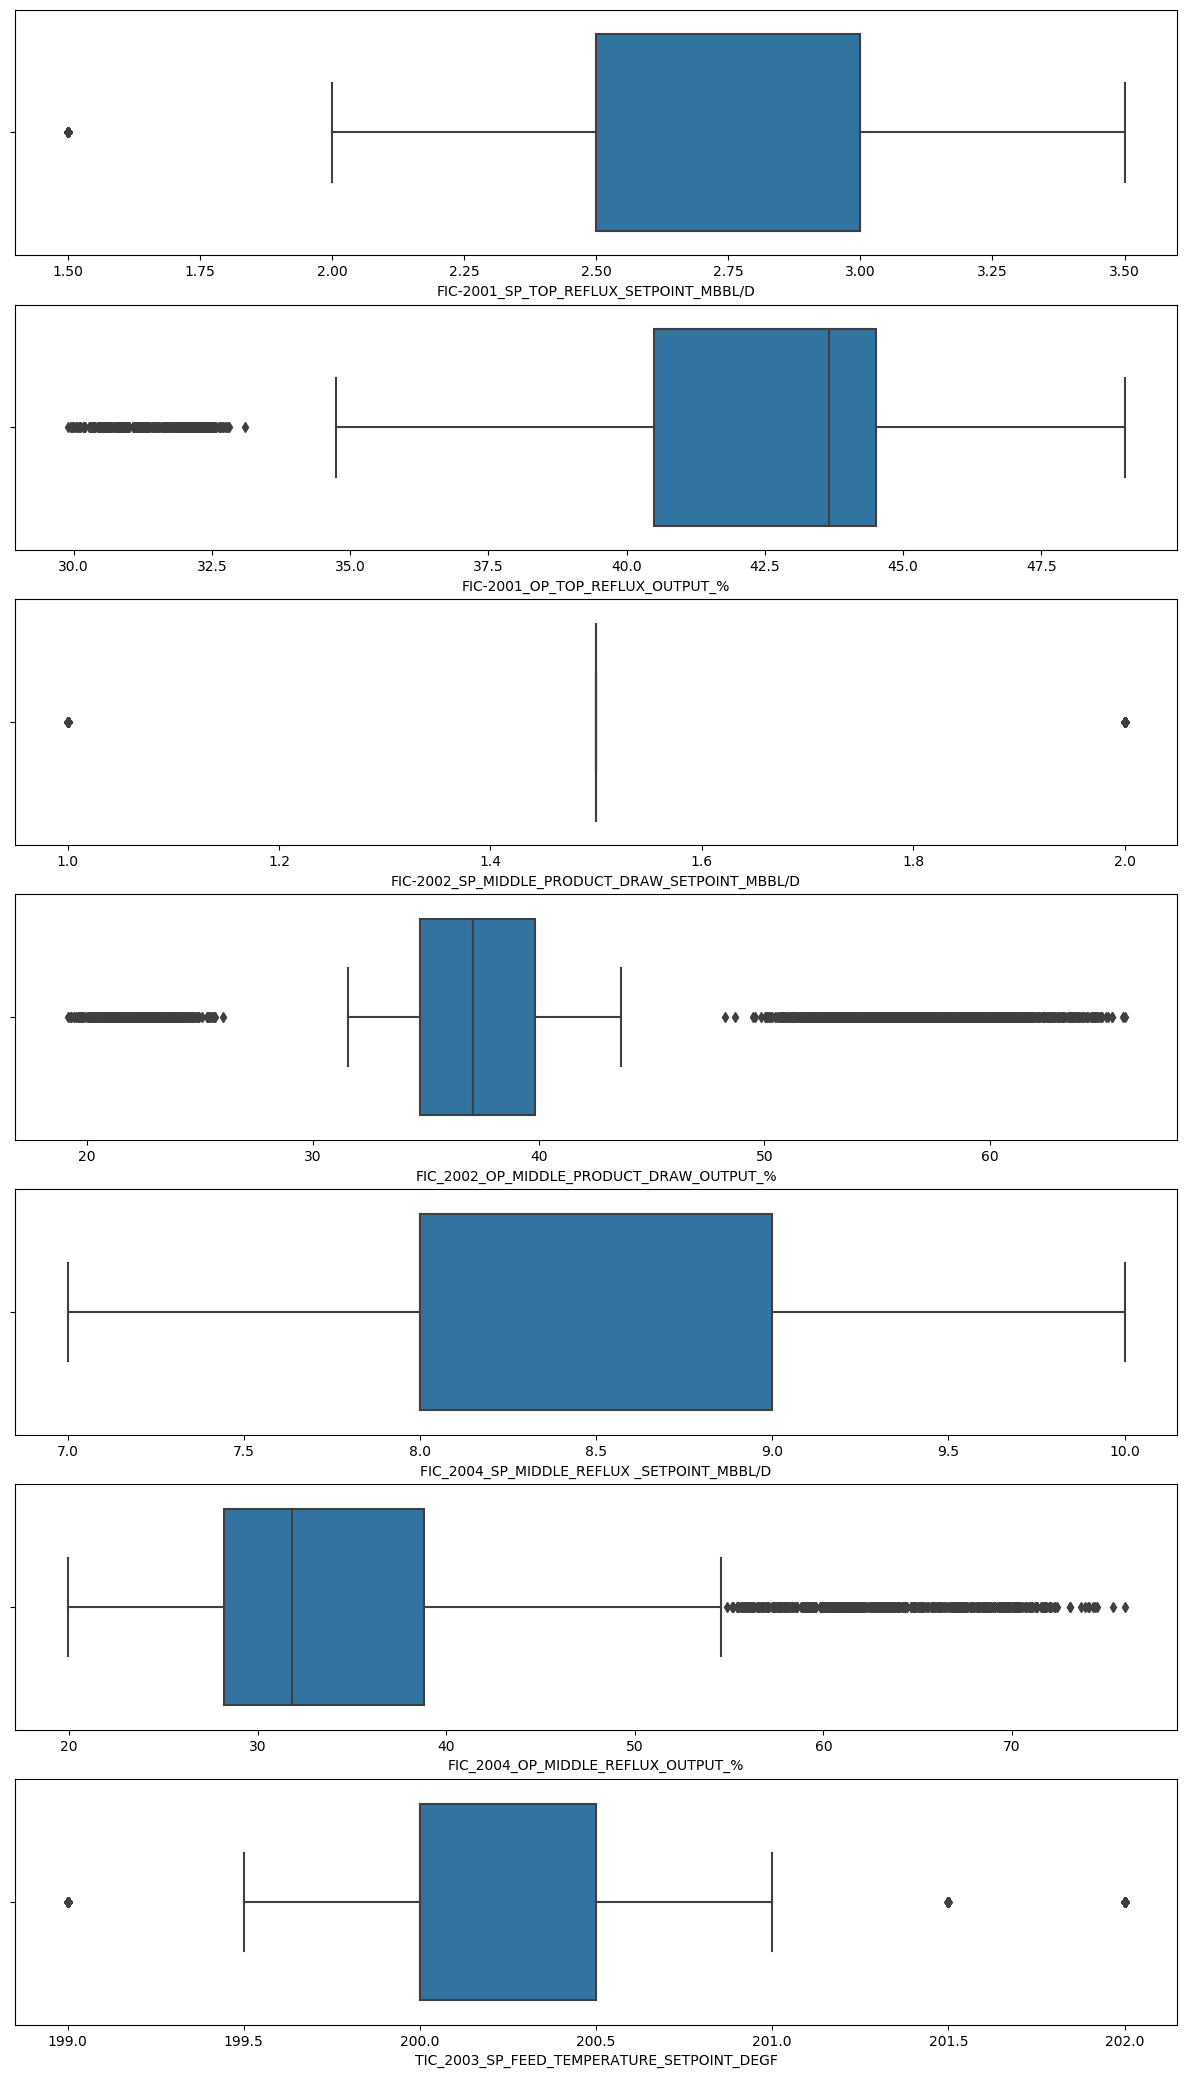

In [11]:
fig2=plt.figure(figsize = (15, 30))

for i in enumerate(controlled_variables):
    plt.subplot(8, 1,i[0]+1)
    fig2=sns.boxplot(df[i[1]])
    fig2.figure.savefig('boxplot.png')
plt.show()

In [12]:
len(manipulated_variables)

3

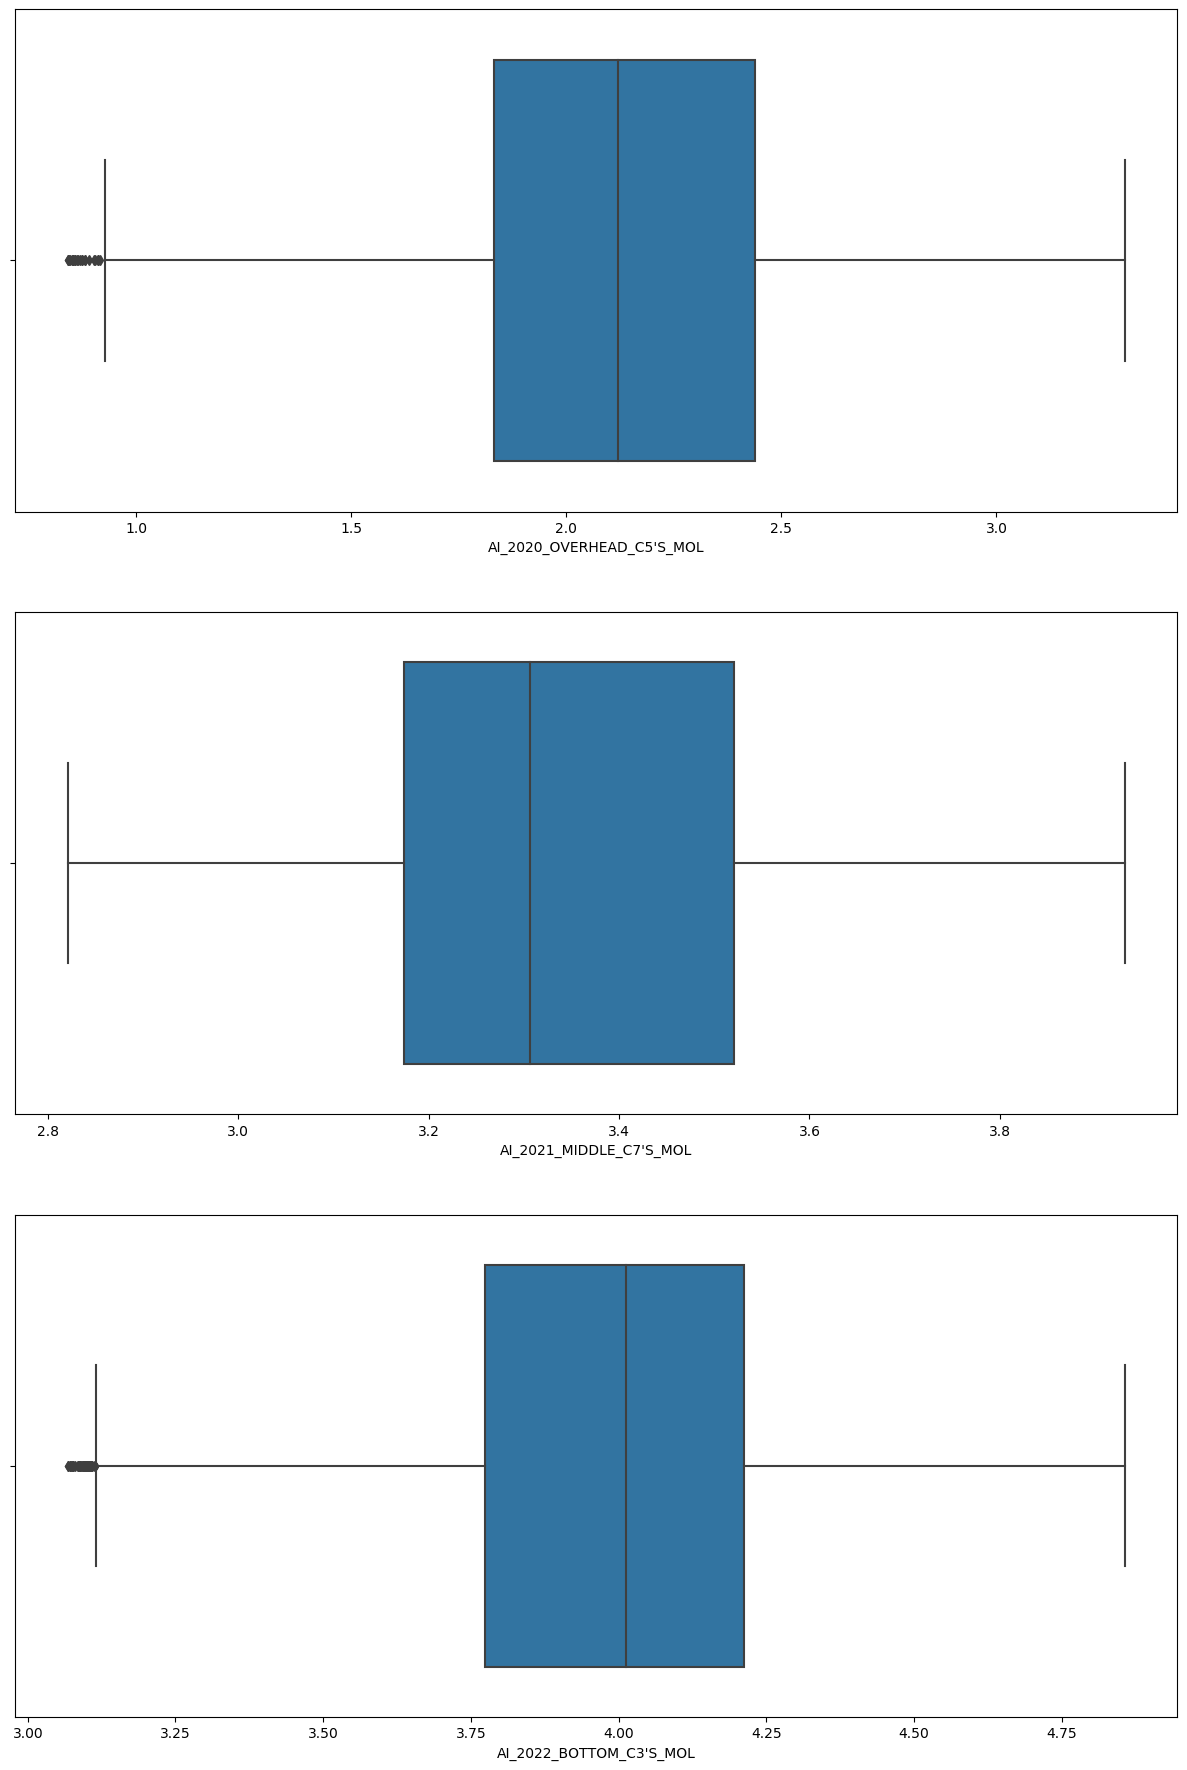

In [15]:
fig3=plt.figure(figsize = (15, 30))

for i in enumerate(manipulated_variables):
    plt.subplot(len(manipulated_variables)+1, 1,i[0]+1)
    fig3=sns.boxplot(df[i[1]])
    fig3.figure.savefig('boxplot_manipulated_variables.png')
plt.show()

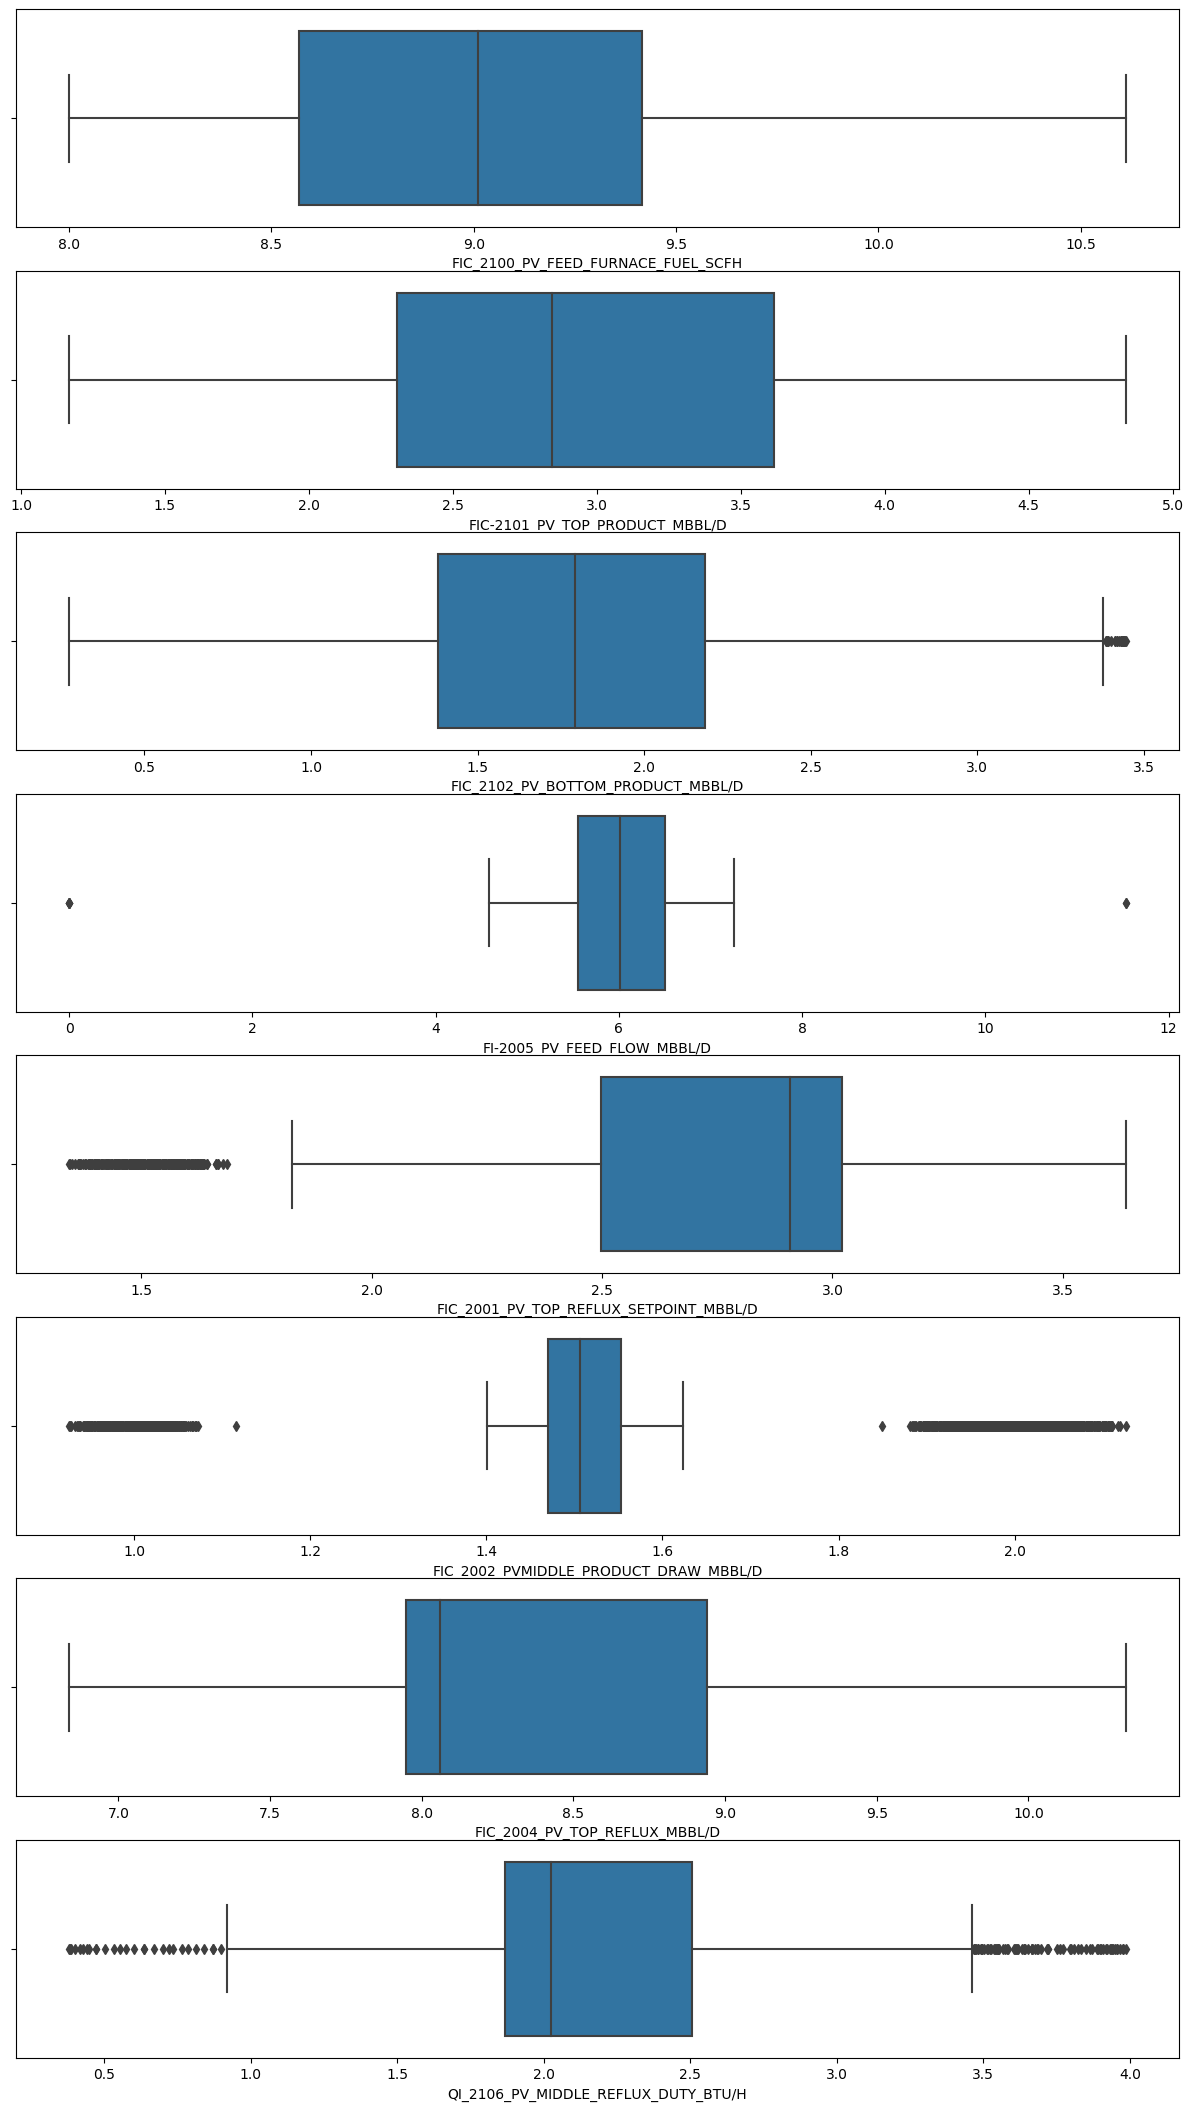

In [20]:
fig4=plt.figure(figsize = (15, 30))

for i in enumerate(response_variables):
    plt.subplot(len(response_variables)+1, 1,i[0]+1)
    fig3=sns.boxplot(df[i[1]])
    fig3.figure.savefig('boxplot_response_variables.png')
plt.show()

In [10]:
df=df[(np.abs(stats.zscore(df["AI_2020_OVERHEAD_C5'S_MOL"])) < 3)]

In [11]:
import matplotlib.dates as mdates
from scipy import stats
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.decomposition import PCA, IncrementalPCA

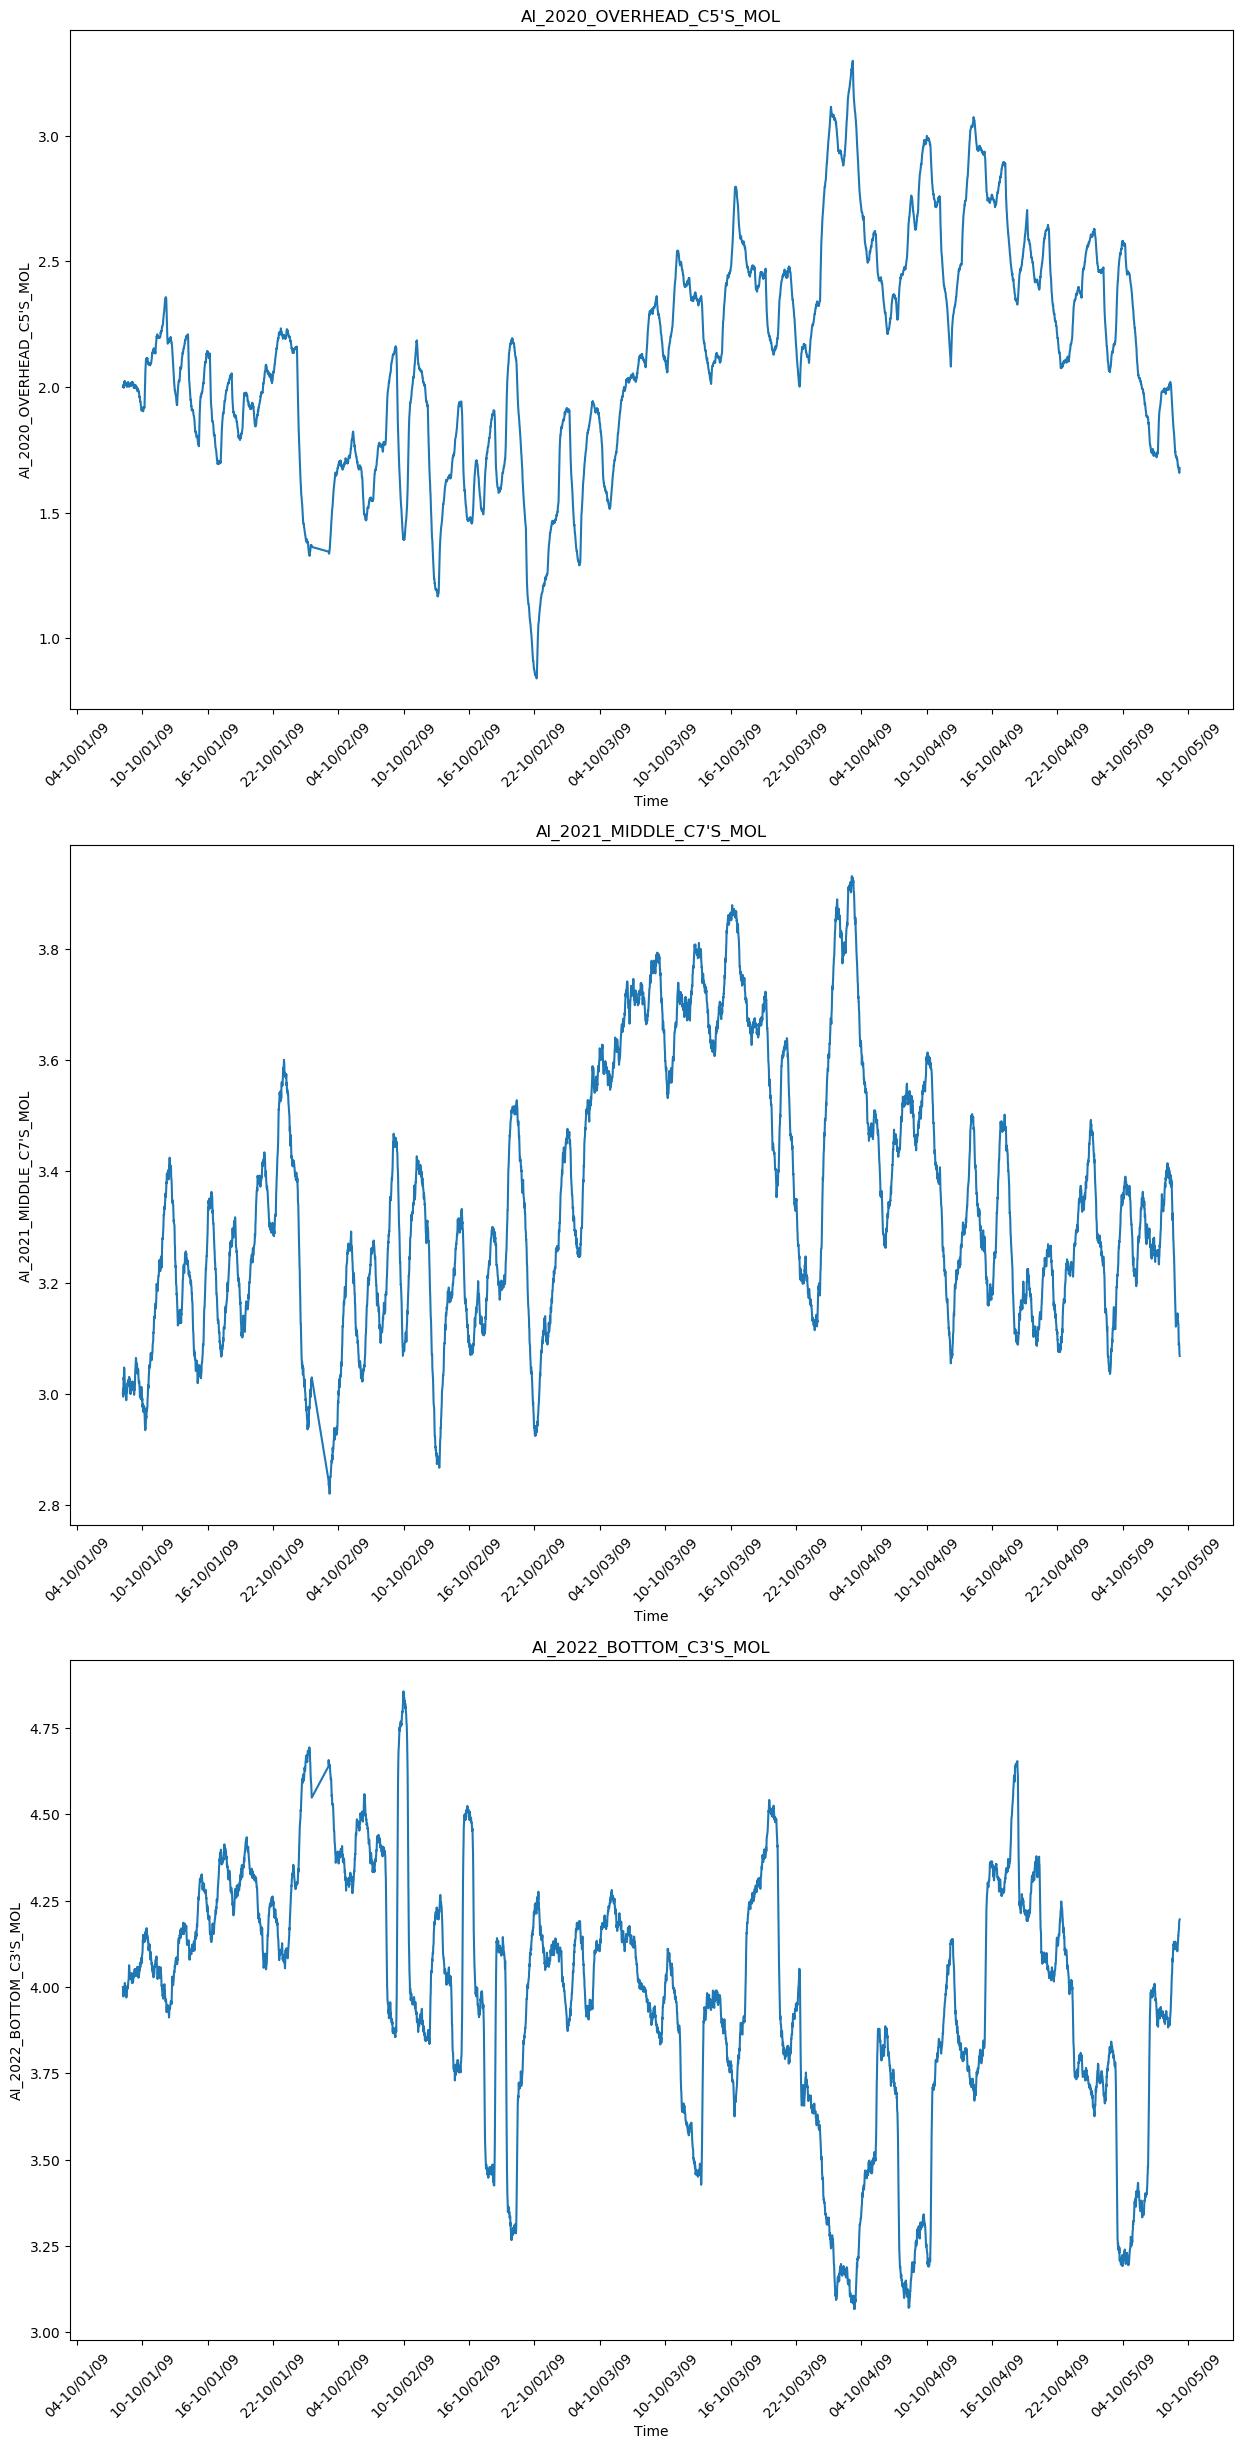

In [17]:
plt.figure(figsize = (15, 30))
for i in enumerate(manipulated_variables):
    plt.subplot(3, 1,i[0]+1)
    plt.plot(df.index,df[i[1]])
    plt.title(df[manipulated_variables].columns[i[0]])
    plt.xlabel('Time')
    plt.ylabel(df[manipulated_variables].columns[i[0]])
   # plt.gcf().autofmt_xdate()
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)

plt.savefig('manipulated_variables.png')

plt.show()

<Figure size 1500x3000 with 0 Axes>

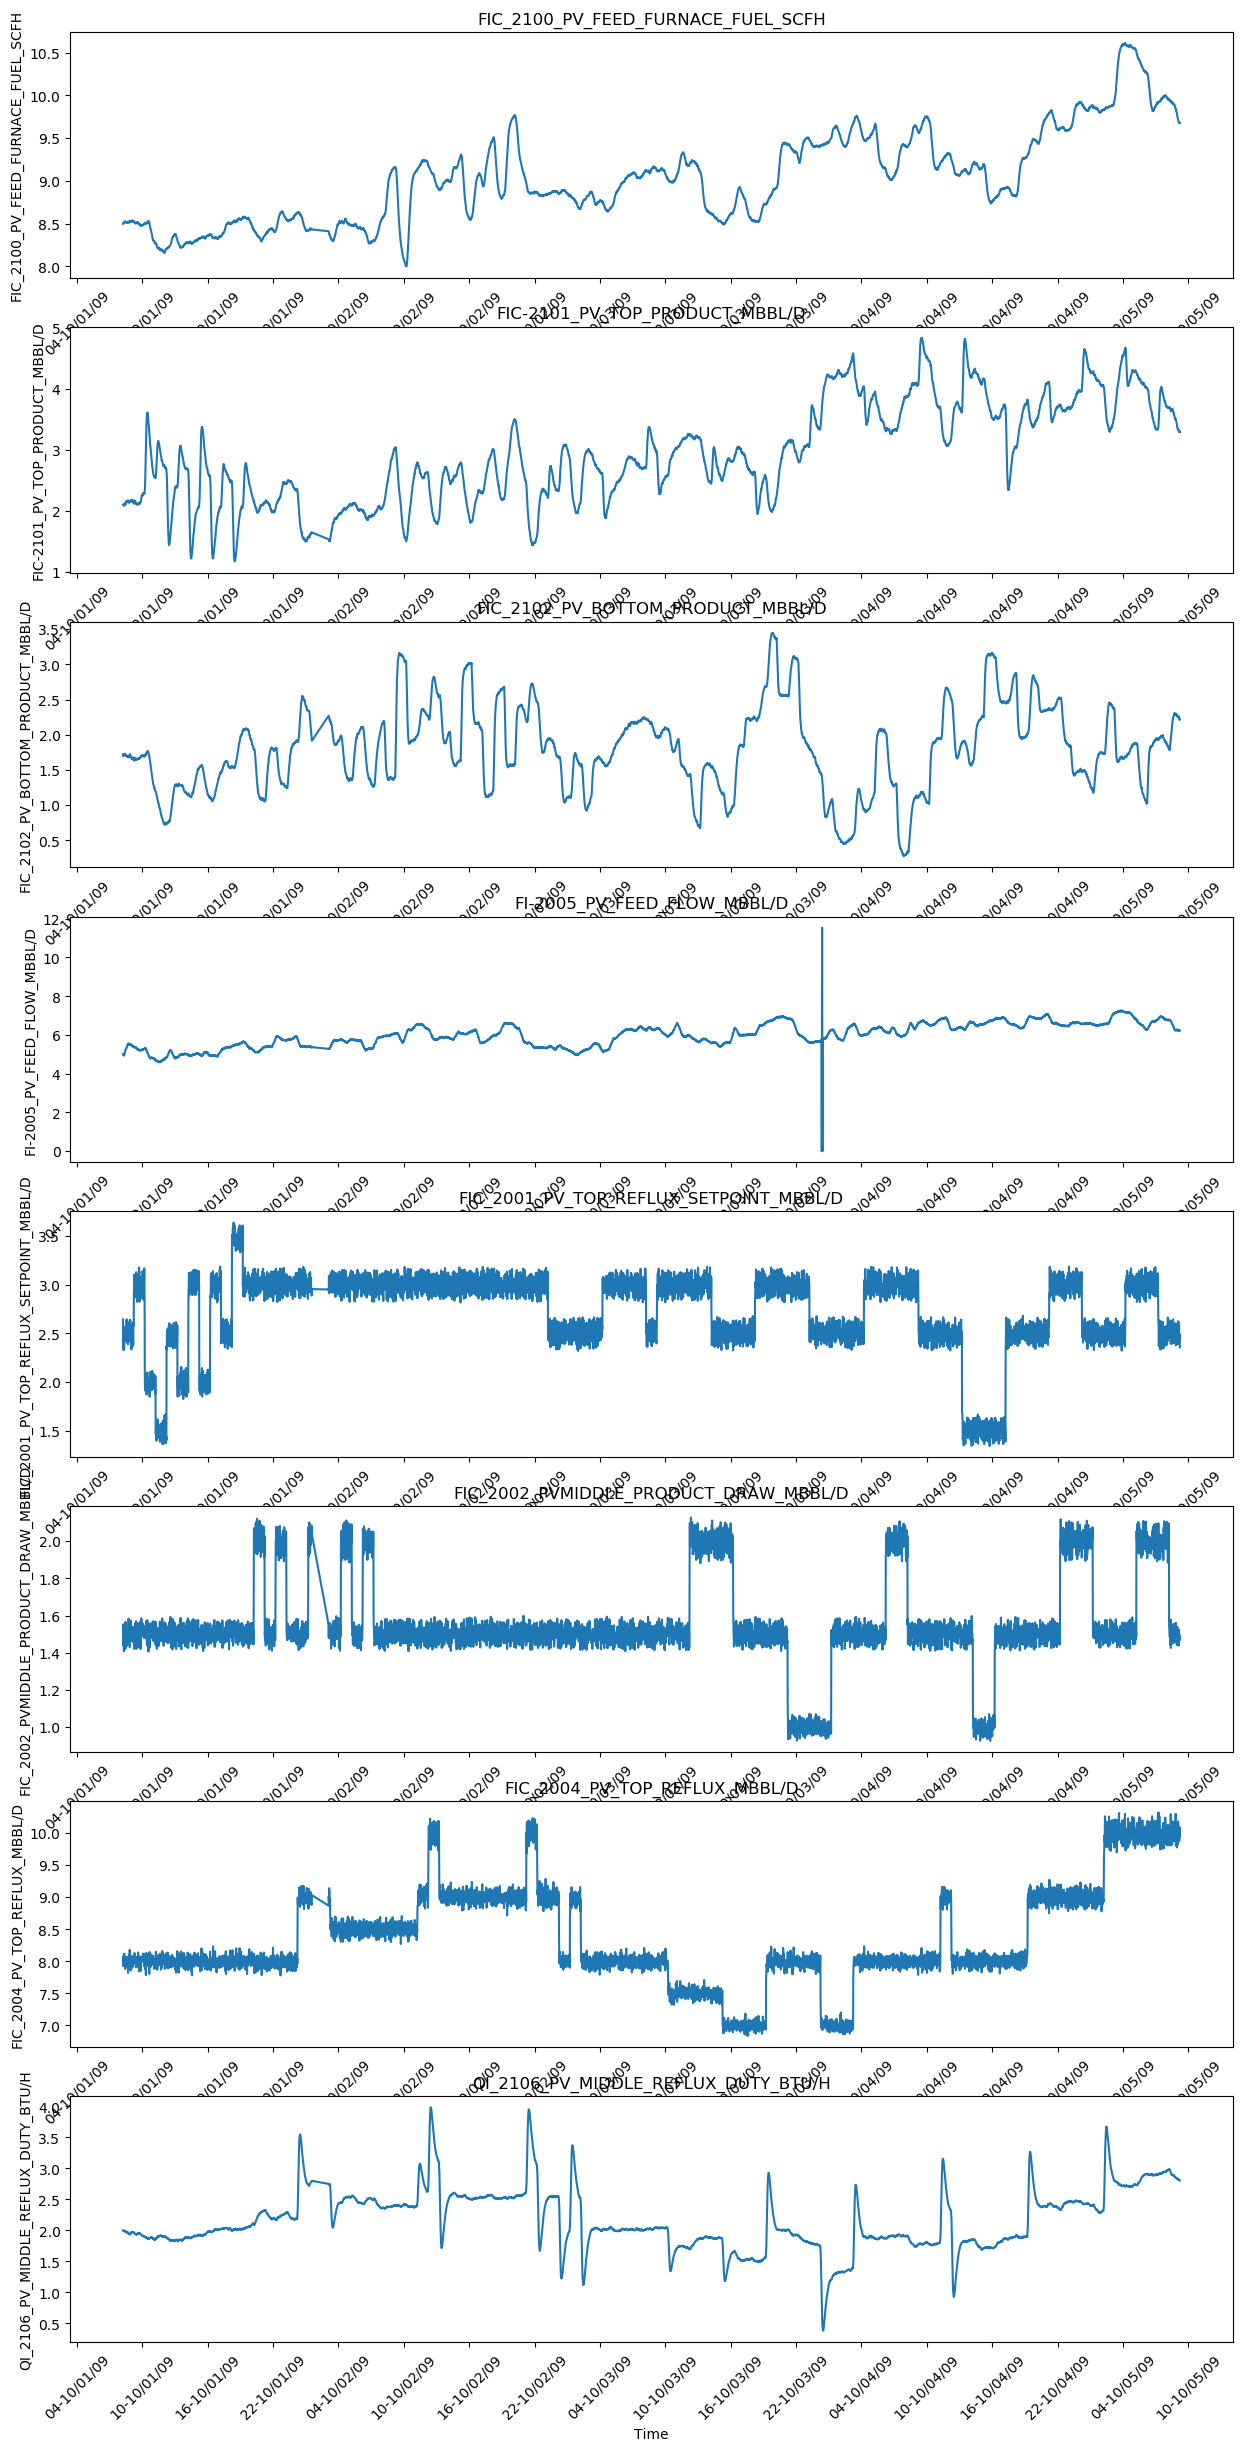

In [28]:
plt.figure(figsize = (15, 30))
for i in enumerate(response_variables):
    plt.subplot(8, 1,i[0]+1)
    plt.plot(df.index,df[i[1]])
    plt.title(df[response_variables].columns[i[0]])
    plt.xlabel('Time')
    plt.ylabel(df[response_variables].columns[i[0]])
   # plt.gcf().autofmt_xdate()
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)

plt.savefig('response_variables.png')
plt.show()

In [12]:
FIC_reflux_top=['FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D','FIC-2001_OP_TOP_REFLUX_OUTPUT_%','FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D']
FIC_reflux_middle=[ 'FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D',
       'FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%',
       'FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D']
FIC_reflux_bottom=['FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D',
       'FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%', 'FIC_2004_PV_TOP_REFLUX_MBBL/D']
furnace=['FIC_2100_PV_FEED_FURNACE_FUEL_SCFH','TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF']

<Figure size 1500x500 with 0 Axes>

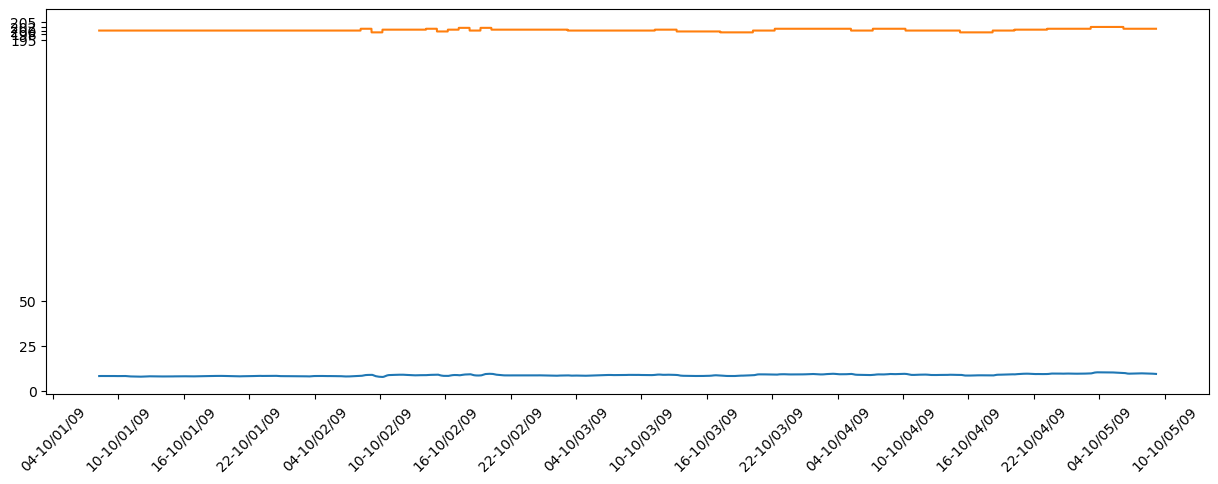

In [20]:
plt.figure(figsize = (15, 5))
for i in enumerate(furnace):
    plt.plot(df.index,df[i[1]])
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)
    plt.yticks([0,25,50,195,198,200,202,205])
plt.show()

In [ ]:
plt.figure(figsize = (15, 5))
for i in enumerate(FIC_reflux_middle):
    plt.plot(good_data["Time"],good_data[i[1]])
    hours = mdates.HourLocator(interval=6)
    hours_fmt = mdates.DateFormatter('%H-%D')
    plt.gca().xaxis.set_major_locator(hours)
    plt.gca().xaxis.set_major_formatter(hours_fmt)
    plt.xticks(rotation = 45)
    #plt.yticks([0,25,50,195,198,200,202,205])
plt.show()

In [15]:
target=df[manipulated_variables]
data=df[controlled_variables+response_variables]

In [16]:
data.corr()

,FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,FIC-2001_OP_TOP_REFLUX_OUTPUT_%,FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF,FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,FIC-2101_PV_TOP_PRODUCT_MBBL/D,FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,FI-2005_PV_FEED_FLOW_MBBL/D,FIC_2001_PV_TOP_REFLUX_SETPOINT_MBBL/D,FIC_2002_PVMIDDLE_PRODUCT_DRAW_MBBL/D,FIC_2004_PV_TOP_REFLUX_MBBL/D,QI_2106_PV_MIDDLE_REFLUX_DUTY_BTU/H
FIC-2001_SP_TOP_REFLUX_SETPOINT_MBBL/D,1.000000,0.981528,0.266313,0.243396,0.170825,0.135397,0.174440,0.026288,-0.419776,0.060521,-0.021923,0.980009,0.265144,0.170146,0.284550
FIC-2001_OP_TOP_REFLUX_OUTPUT_%,0.981528,1.000000,0.268394,0.244264,0.166962,0.135121,0.180826,0.036836,-0.402920,0.052079,-0.018033,0.991546,0.266644,0.166105,0.277906
FIC-2002_SP_MIDDLE_PRODUCT_DRAW_SETPOINT_MBBL/D,0.266313,0.268394,1.000000,0.951962,0.150328,0.163090,0.053747,0.020266,-0.034356,-0.302132,-0.024602,0.262816,0.984732,0.147862,0.225270
FIC_2002_OP_MIDDLE_PRODUCT_DRAW_OUTPUT_%,0.243396,0.244264,0.951962,1.000000,0.127587,0.146202,0.062560,0.041381,-0.001350,-0.297423,-0.013751,0.239624,0.951683,0.125900,0.189590
FIC_2004_SP_MIDDLE_REFLUX _SETPOINT_MBBL/D,0.170825,0.166962,0.150328,0.127587,1.000000,0.918246,0.509396,0.447868,0.034506,0.308827,0.270945,0.167011,0.149293,0.991276,0.871146
FIC_2004_OP_MIDDLE_REFLUX_OUTPUT_%,0.135397,0.135121,0.163090,0.146202,0.918246,1.000000,0.522131,0.502408,0.099093,0.249892,0.292929,0.131806,0.162047,0.919339,0.788004
TIC_2003_SP_FEED_TEMPERATURE_SETPOINT_DEGF,0.174440,0.180826,0.053747,0.062560,0.509396,0.522131,1.000000,0.705070,0.450846,-0.404779,0.194366,0.168893,0.053906,0.506611,0.307202
FIC_2100_PV_FEED_FURNACE_FUEL_SCFH,0.026288,0.036836,0.020266,0.041381,0.447868,0.502408,0.705070,1.000000,0.785949,-0.020650,0.701633,0.024442,0.018173,0.444731,0.217991
FIC-2101_PV_TOP_PRODUCT_MBBL/D,-0.419776,-0.402920,-0.034356,-0.001350,0.034506,0.099093,0.450846,0.785949,1.000000,-0.226228,0.586865,-0.412695,-0.037769,0.031764,-0.211327
FIC_2102_PV_BOTTOM_PRODUCT_MBBL/D,0.060521,0.052079,-0.302132,-0.297423,0.308827,0.249892,-0.404779,-0.020650,-0.226228,1.000000,0.371252,0.062734,-0.298491,0.310565,0.338084


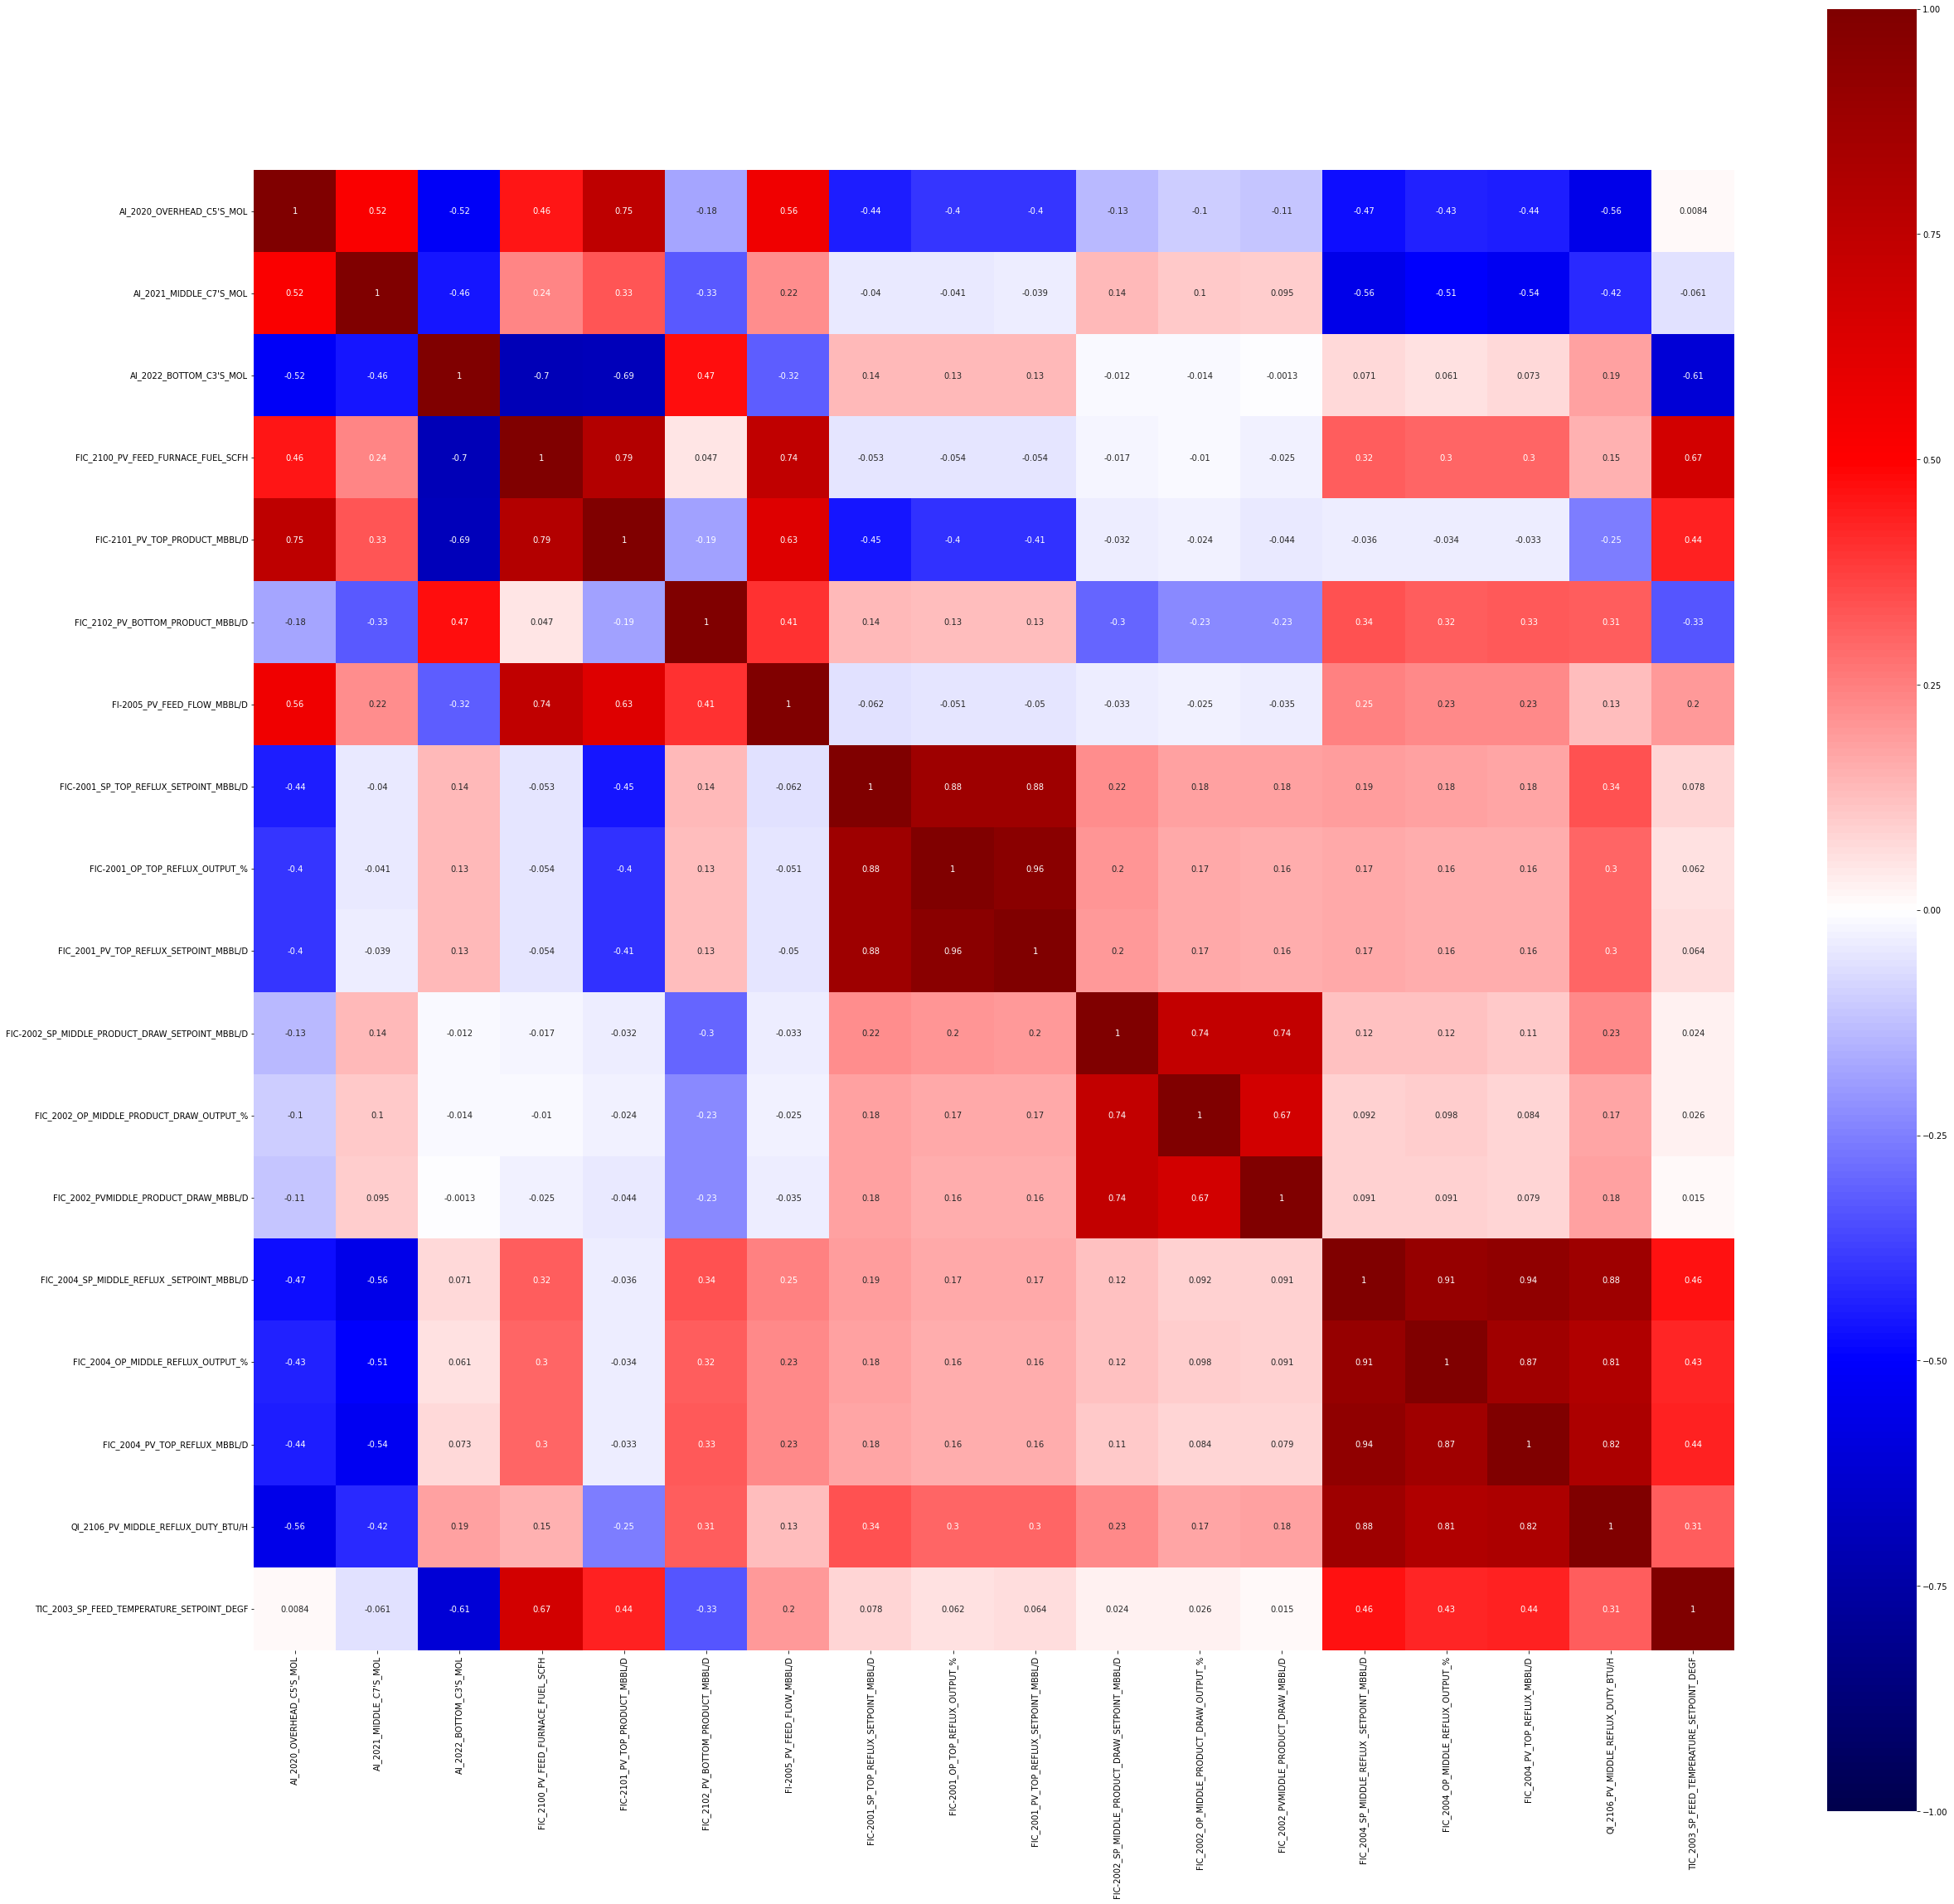

In [17]:
#find the correlation between features
plt.figure(figsize=(40,40))
fig3=sns.heatmap(df.corr(method='spearman'),vmin=-1,vmax=1,cmap= 'seismic',annot=True,square=True)
fig3.figure.savefig('heat map correlation.png')
plt.show()

### Principle components analysis

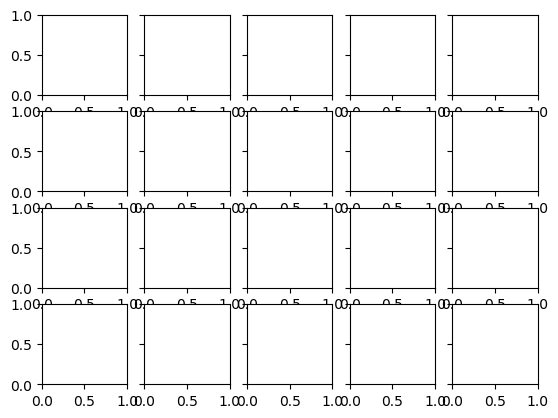

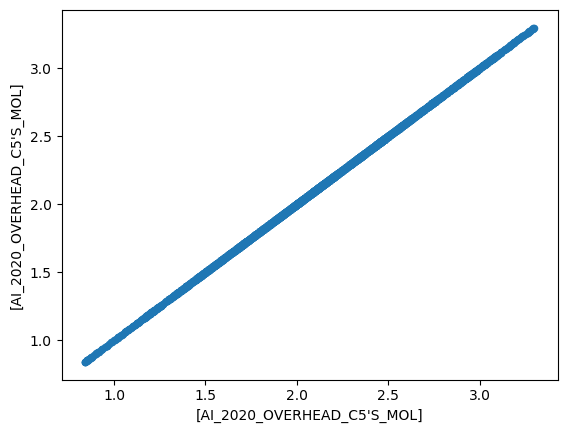

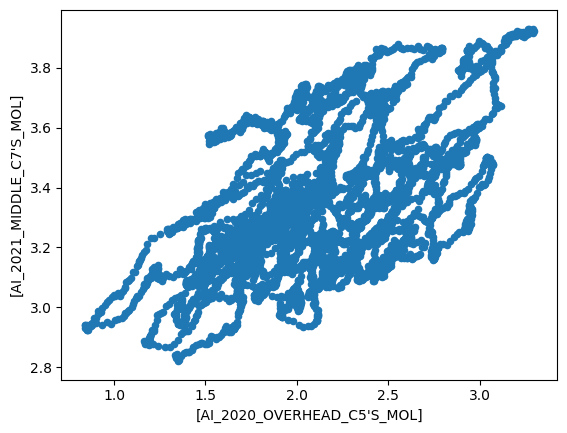

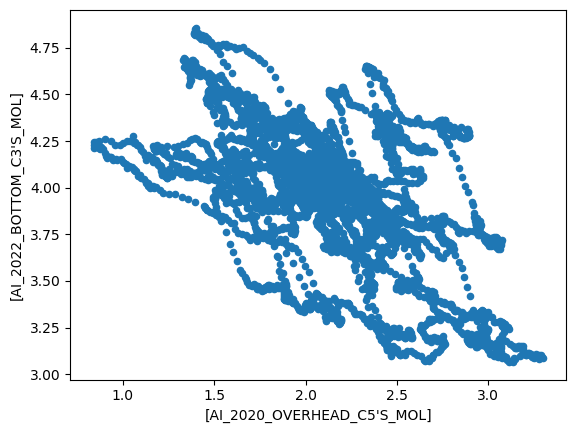

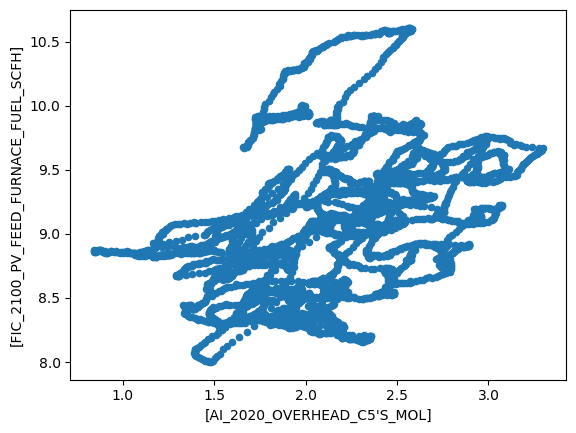

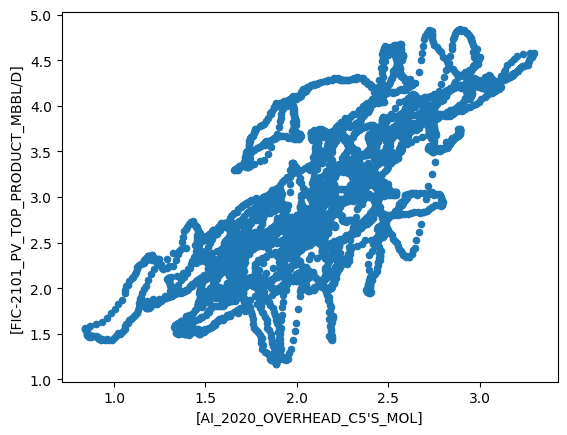

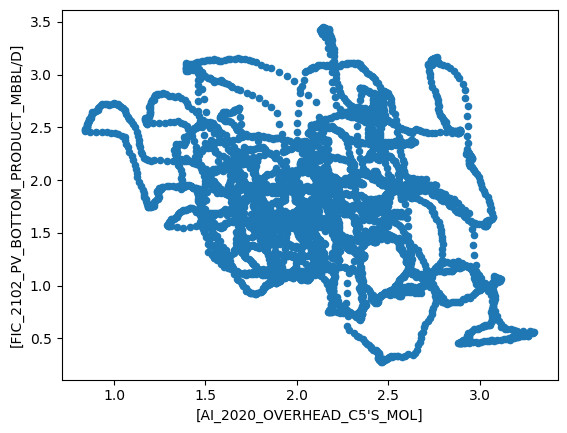

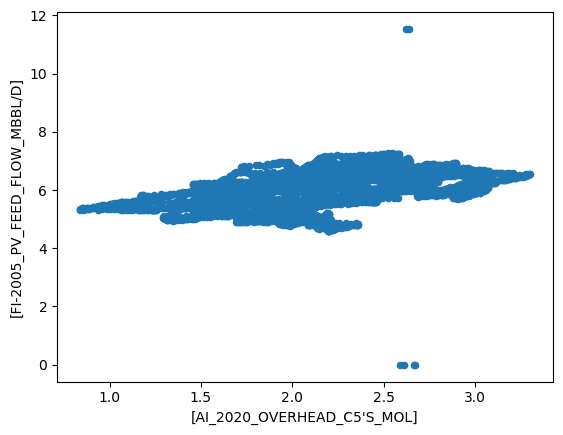

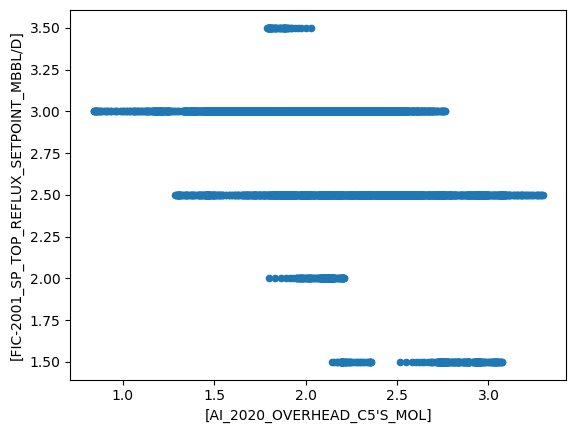

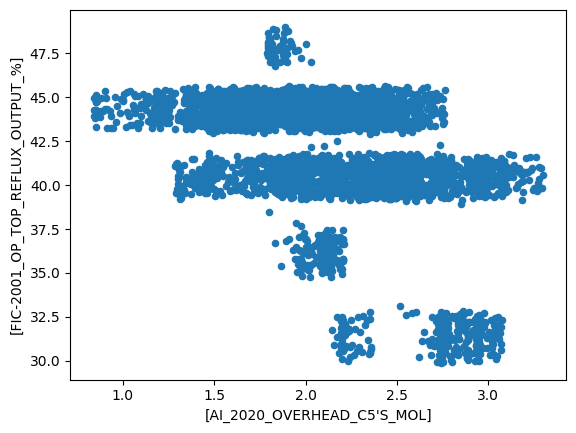

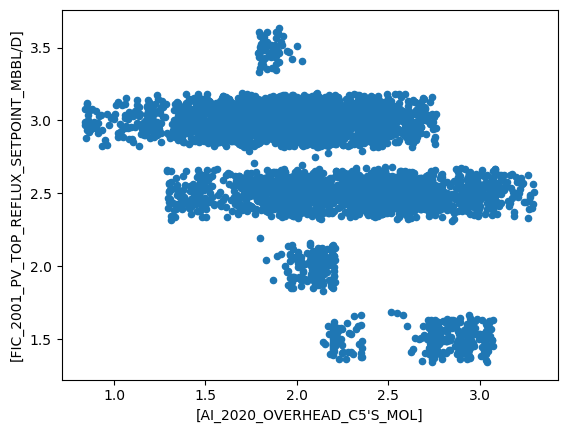

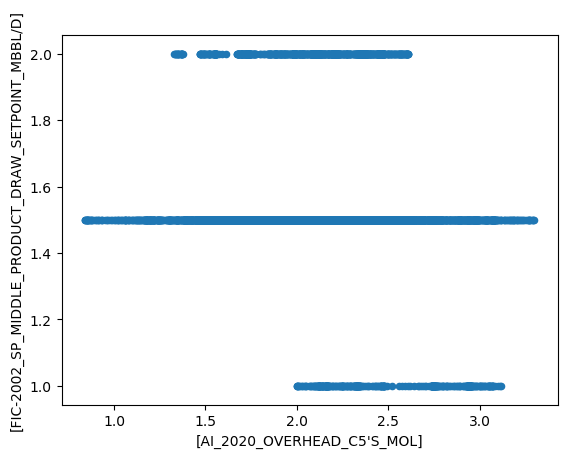

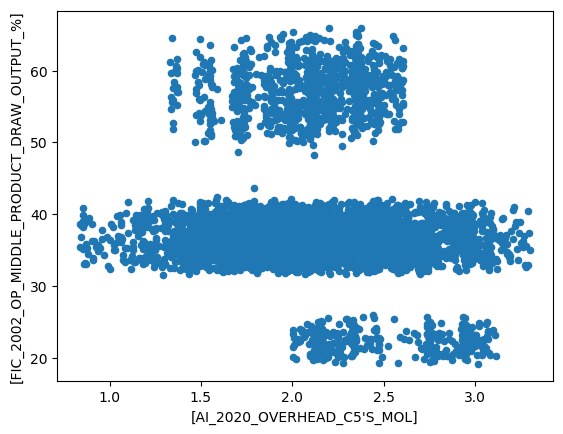

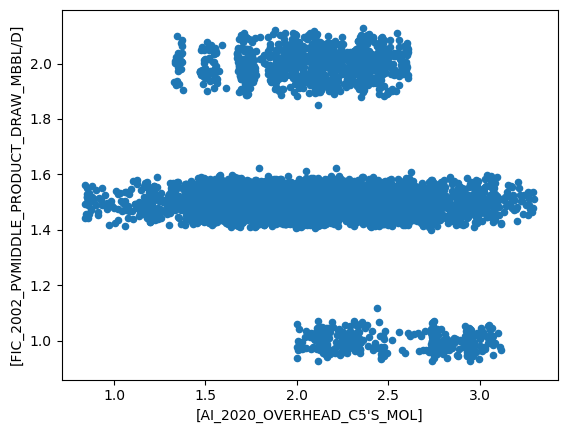

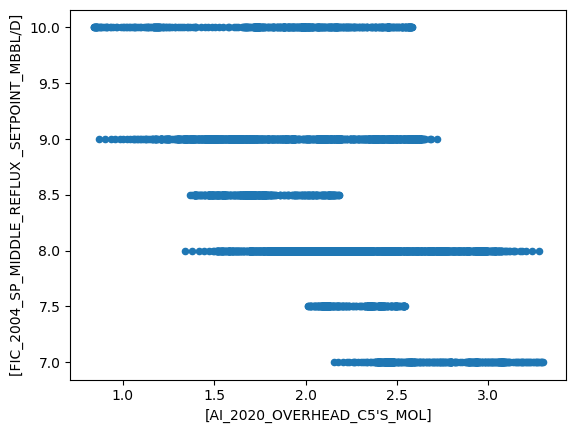

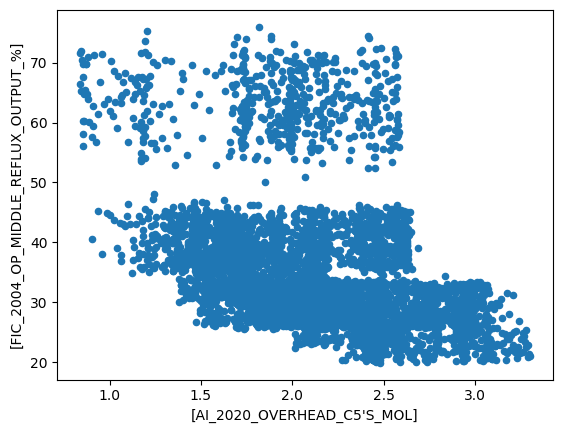

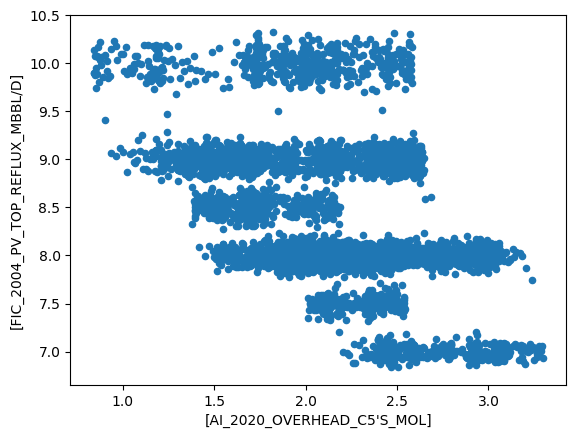

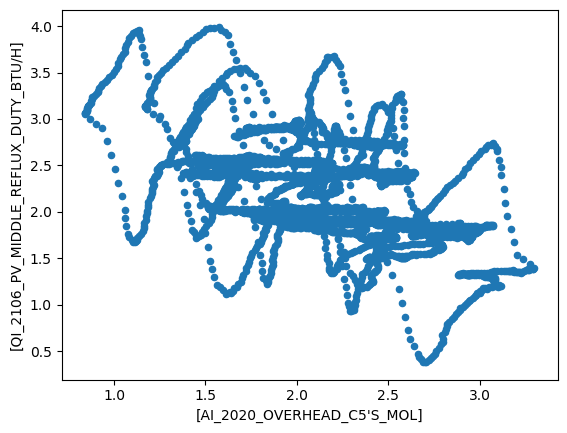

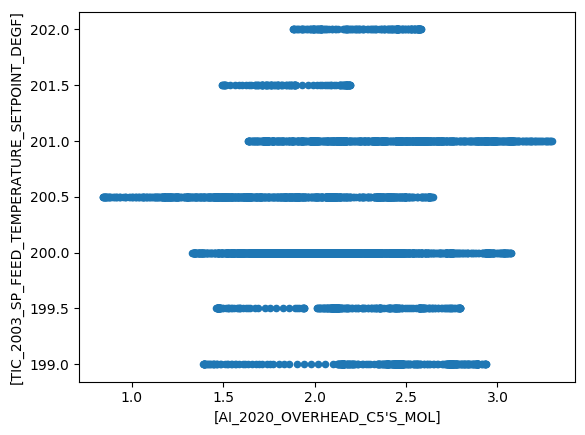

In [54]:
fig, axes = plt.subplots(4,5, sharey=True)

for i, col in enumerate(df.columns.values[:]):
    df.plot(x=["AI_2020_OVERHEAD_C5'S_MOL"], y=[col], kind="scatter")
#, ax=axes[i]
    plt.show()

### regression model

In [18]:
X=df.iloc[:,0:1]
print(X.head())
len(X.columns)

                     AI_2020_OVERHEAD_C5'S_MOL
Time                                          
2009-10-01 08:14:00                    2.00000
2009-10-01 08:15:00                    2.00360
2009-10-01 08:16:00                    2.00870
2009-10-01 08:17:00                    2.00385
2009-10-01 08:18:00                    1.99852


1

In [22]:
y=df.iloc[:,3:5]

print(len(y.columns))
y.head()

2


                     FIC_2100_PV_FEED_FURNACE_FUEL_SCFH  \
Time                                                      
2009-10-01 08:14:00                             8.50000   
2009-10-01 08:15:00                             8.50735   
2009-10-01 08:16:00                             8.50977   
2009-10-01 08:17:00                             8.50838   
2009-10-01 08:18:00                             8.50365   

                     FIC-2101_PV_TOP_PRODUCT_MBBL/D  
Time                                                 
2009-10-01 08:14:00                         2.10000  
2009-10-01 08:15:00                         2.09686  
2009-10-01 08:16:00                         2.09280  
2009-10-01 08:17:00                         2.08587  
2009-10-01 08:18:00                         2.08028  

In [22]:
y=df.iloc[:,3:5]

print(len(y.columns))
y.head()

2


                     FIC_2100_PV_FEED_FURNACE_FUEL_SCFH  \
Time                                                      
2009-10-01 08:14:00                             8.50000   
2009-10-01 08:15:00                             8.50735   
2009-10-01 08:16:00                             8.50977   
2009-10-01 08:17:00                             8.50838   
2009-10-01 08:18:00                             8.50365   

                     FIC-2101_PV_TOP_PRODUCT_MBBL/D  
Time                                                 
2009-10-01 08:14:00                         2.10000  
2009-10-01 08:15:00                         2.09686  
2009-10-01 08:16:00                         2.09280  
2009-10-01 08:17:00                         2.08587  
2009-10-01 08:18:00                         2.08028  

In [23]:
df.head()

                     AI_2020_OVERHEAD_C5'S_MOL  AI_2021_MIDDLE_C7'S_MOL  \
Time                                                                      
2009-10-01 08:14:00                    2.00000                  3.00000   
2009-10-01 08:15:00                    2.00360                  3.00954   
2009-10-01 08:16:00                    2.00870                  2.99518   
2009-10-01 08:17:00                    2.00385                  3.01356   
2009-10-01 08:18:00                    1.99852                  3.02963   

                     AI_2022_BOTTOM_C3'S_MOL  \
Time                                           
2009-10-01 08:14:00                  4.00000   
2009-10-01 08:15:00                  3.99831   
2009-10-01 08:16:00                  3.97746   
2009-10-01 08:17:00                  3.97262   
2009-10-01 08:18:00                  3.98841   

                     FIC_2100_PV_FEED_FURNACE_FUEL_SCFH  \
Time                                                      
2009-10-01 08:14:00

In [24]:
#Import Libraries
import sklearn
from sklearn.model_selection import train_test_split

In [18]:
X=df.iloc[:,0:1]
print(X.head())
len(X.columns)

                     AI_2020_OVERHEAD_C5'S_MOL
Time                                          
2009-10-01 08:14:00                    2.00000
2009-10-01 08:15:00                    2.00360
2009-10-01 08:16:00                    2.00870
2009-10-01 08:17:00                    2.00385
2009-10-01 08:18:00                    1.99852


1

In [25]:

#----------------------------------------------------

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3838, 1)
X_test shape is  (1891, 1)
y_train shape is  (3838, 2)
y_test shape is  (1891, 2)


In [22]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
LinearRegModel=LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=1)
LinearRegModel.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [28]:
print('Linear Regression Train Score is : ' , LinearRegModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegModel.coef_)
print('Linear Regression intercept is : ' , LinearRegModel.intercept_)
print('----------------------------------------------------')


Linear Regression Train Score is :  0.4514884806616704
Linear Regression Test Score is :  0.4450428960133827
Linear Regression Coef is :  [[0.50615865]
 [1.39966586]]
Linear Regression intercept is :  [ 7.96631817 -0.0347141 ]
----------------------------------------------------


In [29]:
X_predicted=LinearRegModel.predict(X_test)


In [31]:
X_predicted.shape,y_test.shape

((1891, 2), (1891, 2))

In [40]:
y_test.keys

<bound method NDFrame.keys of                      FIC_2100_PV_FEED_FURNACE_FUEL_SCFH  \
Time                                                      
2009-10-03 01:31:00                             8.80194   
2009-10-02 21:49:00                             8.86267   
2009-10-04 03:36:00                             9.76173   
2009-10-04 16:36:00                             8.84108   
2009-10-02 21:31:00                             8.86457   
...                                                 ...   
2009-10-05 06:12:00                            10.25700   
2009-10-04 00:20:00                             9.41421   
2009-10-05 05:39:00                            10.36690   
2009-10-02 12:45:00                             9.06795   
2009-10-02 09:49:00                             8.20544   

                     FIC-2101_PV_TOP_PRODUCT_MBBL/D  
Time                                                 
2009-10-03 01:31:00                         2.21834  
2009-10-02 21:49:00                     

In [45]:
type(X_predicted)

numpy.ndarray

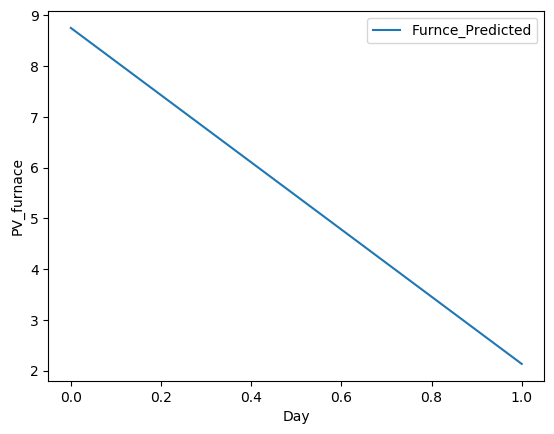

In [47]:
#plt.plot(y_test ['FIC_2100_PV_FEED_FURNACE_FUEL_SCFH'], label='Furnace_actual')
plt.plot(X_predicted[0], label='Furnce_Predicted')
plt.xlabel('Day')
plt.ylabel('PV_furnace')
plt.legend()
plt.show()

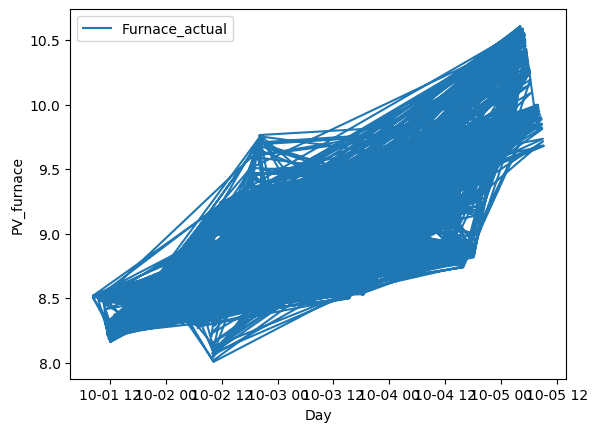

In [55]:
plt.plot(y_test ['FIC_2100_PV_FEED_FURNACE_FUEL_SCFH'], label='Furnace_actual')
plt.xlabel('Day')
plt.ylabel('PV_furnace')
plt.legend()
plt.show()

In [56]:
y=df.iloc[:,4:5]

print(len(y.columns))
y.head()

1


                     FIC-2101_PV_TOP_PRODUCT_MBBL/D
Time                                               
2009-10-01 08:14:00                         2.10000
2009-10-01 08:15:00                         2.09686
2009-10-01 08:16:00                         2.09280
2009-10-01 08:17:00                         2.08587
2009-10-01 08:18:00                         2.08028

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3838, 1)
X_test shape is  (1891, 1)
y_train shape is  (3838, 1)
y_test shape is  (1891, 1)


In [58]:
LinearRegModel=LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=1)
LinearRegModel.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [59]:
print('Linear Regression Train Score is : ' , LinearRegModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegModel.coef_)
print('Linear Regression intercept is : ' , LinearRegModel.intercept_)
print('----------------------------------------------------')


Linear Regression Train Score is :  0.5759702819561205
Linear Regression Test Score is :  0.5746136071028606
Linear Regression Coef is :  [[1.39966586]]
Linear Regression intercept is :  [-0.0347141]
----------------------------------------------------


In [62]:
y_predicted=LinearRegModel.predict(X_test)
y_predicted.shape

(1891, 1)

In [ ]:
y_test=y

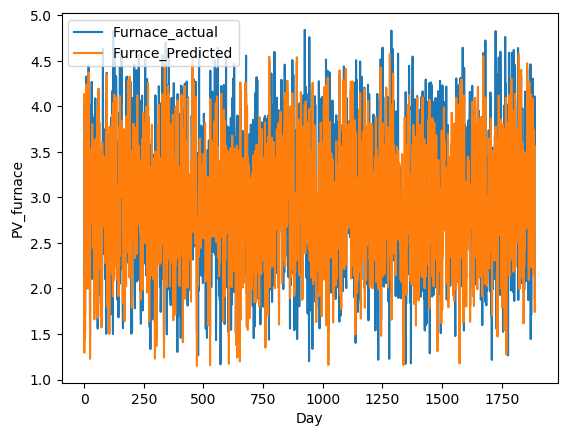

In [65]:
plt.plot(y_test.values , label='Furnace_actual')
plt.plot(y_predicted, label='Furnce_Predicted')
plt.xlabel('Day')
plt.ylabel('PV_furnace')
plt.legend()
plt.show()

## ----------------------------------------------------

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import sklearn
from scipy import stats
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from datetime import date
from sklearn.preprocessing import MinMaxScaler


In [19]:
X=df.iloc[:,0:1]
print(X.head())
len(X.columns)

                     AI_2020_OVERHEAD_C5'S_MOL
Time                                          
2009-10-01 08:14:00                    2.00000
2009-10-01 08:15:00                    2.00360
2009-10-01 08:16:00                    2.00870
2009-10-01 08:17:00                    2.00385
2009-10-01 08:18:00                    1.99852


1

In [20]:
y=df.iloc[:,4:5]

print(len(y.columns))
y.head()

1


,FIC-2101_PV_TOP_PRODUCT_MBBL/D
Time,
2009-10-01 08:14:00,2.10000
2009-10-01 08:15:00,2.09686
2009-10-01 08:16:00,2.09280
2009-10-01 08:17:00,2.08587
2009-10-01 08:18:00,2.08028


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=44, shuffle =True)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3838, 1), (1891, 1), (3838, 1), (1891, 1))

In [26]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [27]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([3838, 1]),
 torch.Size([1891, 1]),
 torch.Size([3838, 1]),
 torch.Size([1891, 1]))

In [28]:
from torch.utils.data import Dataset

class DataReg(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    

In [49]:
train_dataset = DataReg(X_train, y_train)
test_dataset = DataReg(X_test, y_test)

In [50]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [51]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


In [67]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([64, 1]) torch.Size([64, 1])


In [68]:
# Define the TabTransformer model
class TabTransformer(nn.Module):
    def __init__(self, input_size, output_size, num_layers, d_model, num_heads, dim_feedforward, dropout):
        super(TabTransformer, self).__init__()

        self.embedding = nn.Linear(input_size, d_model)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=d_model,
                nhead=num_heads,
                dim_feedforward=dim_feedforward,
                dropout=dropout
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)
        x = self.transformer(x)
        x = x.permute(1, 0, 2)
        x = self.fc(x[:, -1, :])
        return x

In [81]:

# Set the hyperparameters
input_size = 1
output_size = 1
num_layers = 3
d_model = 32
num_heads = 4
dim_feedforward = 64
dropout = 0.1
lr = 0.001
batch_size = 64
num_epochs = 100
seq_len = 12

In [76]:
# Define the model, loss function, and optimizer
model = TabTransformer(input_size, output_size, num_layers, d_model, num_heads, dim_feedforward, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


In [77]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0

In [78]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [79]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [80]:

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x1 and 4x32)